In [95]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


'''
Remove comments from if running the coordinate_finder function
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
'''



These are just a handful of methods that i had set up for quick use when processing data.

There are several more moments where i'd wish to make more of these, especially when I break the data out below, but i also wanted to handle the data by hand to practice the manipulation and the code.

In [96]:
#Useful Functions For Bird People
def Max_Value(data,column=str):
    # This finds the maximum value in a column
    max_value_item = data[column].value_counts().idxmax()
    max_value_quantity = data[column].value_counts().max()
    if isinstance(max_value_item, datetime):
        max_value_item = max_value_item.date()

    return max_value_item,max_value_quantity

def Min_Value(data,column=str):
    # This finds the minimum value in a column.
    min_value_item = data[column].value_counts().idxmin()
    min_value_quantity = data[column].value_counts().min()
    if isinstance(min_value_item, datetime):
        max_value_item = min_value_item.date()
        
    return min_value_item,min_value_quantity

def Date_Fixer(data):
    # This function sets up date and time for future use when sorting. 
    data['Date'] = data['Date_time'].dt.strftime("%m-%d")
    data['Month'] = pd.to_datetime(data['Date_time']).dt.strftime('%B')
    return data[['Month','Date','Bird Species','Location','Date_time']]


def date_sort_by_year(data,year):
    # Automatic sorter for multiple years of data. 
    # The way the data is set up is that 2021 would include the last 2 months of the year before.  Counting it as the Winter-Spring season.
    # This is more a data block for the beginning of that year.  
    if year > 2024 or year < 2021:
        print('year is outside current data set')
    return data[(data['Date_time'] >= f'{str(year-1)}-11-01') & (final_df['Date_time'] <= f'{str(year)}-04-30')]

def birds_of_year(data):
    # creates a data frame of birds_of_202X
    return data.groupby('Bird Species').size().reset_index(name='Count').sort_values(by='Count',ascending=False)

def locations_of_year(data):
    #creates a dataframe of locations_of_202x
    return data.groupby('Location').size().reset_index(name='Count').sort_values(by='Count',ascending=False)

def feeder_visits_organizer(data, year):
    #organizes data into total visits per month, per dataset
    return data.groupby('Month').size().reset_index(name=f'Count {year}')


I downloaded the datafile from this website: https://feederwatch.org/explore/raw-dataset-requests/

The data set i used was **checklist data 2021-2024.**

When you're running this dataset, also make sure to download the **Species Translation Table** as you will need it later.

Unless you want to process the data from an absolutly fresh start, you can just start on the line that has **filtered_df**

it will pop an error if you try to access it without unzipping the file **;)**

In [97]:

#Data Import from "PFW_all_2021_2024_May2024_Public.csv"
#df_new = pd.read_csv("PFW_all_2021_2024_May2024_Public.csv")
#df_new


In [ ]:
'''
#Filtering list down to only contain OHIO bird spots
filtered_df = df_new[df_new['SUBNATIONAL1_CODE'] == 'US-OH']
filtered_df.to_csv('Ohio_Only_Birders_DF.csv')
'''
#Data import from 'Ohio_Only_Birders_DF.csv'
filtered_df = pd.read_csv('Ohio_Only_Birders_DF.csv')
filtered_df

This process is just a lot of me checking what i have to work with, the size of the dataset at this point is about 400k rows.

In [99]:

column_list = filtered_df.keys().tolist()
print(column_list)

filtered_df = filtered_df[['LOC_ID','LATITUDE','LONGITUDE','Month','Day','Year','SPECIES_CODE','VALID','REVIEWED']]
filtered_df

['LOC_ID', 'LATITUDE', 'LONGITUDE', 'Month', 'Day', 'Year', 'SPECIES_CODE', 'VALID', 'REVIEWED']


,LOC_ID,LATITUDE,LONGITUDE,Month,Day,Year,SPECIES_CODE,VALID,REVIEWED
0,L10007061,41.111452,-81.964967,1,7,2022,eursta,1.0,0.0
1,L10007061,41.111452,-81.964967,1,7,2022,dowwoo,1.0,0.0
2,L10007061,41.111452,-81.964967,1,7,2022,bkcchi,1.0,0.0
3,L10007061,41.111452,-81.964967,1,7,2022,norcar,1.0,0.0
4,L10007061,41.111452,-81.964967,1,7,2022,blujay,1.0,0.0
...,...,...,...,...,...,...,...,...,...
437417,L99248,39.079719,-84.406433,12,26,2021,moudov,1.0,0.0
437418,L99248,39.079719,-84.406433,12,26,2021,daejun,1.0,0.0
437419,L99248,39.079719,-84.406433,12,26,2021,carchi,1.0,0.0
437420,L99248,39.079719,-84.406433,12,26,2021,tuftit,1.0,0.0


While reading through the feederwatch website, they talk about how they validate their data. Two of my columns are 'Valid' and 'Reviewed'

If Valid = 1, and Reviewed = 1 then the bird is confirmed to be the correct species
If Valid = 1, and Reviewed = 0 then the bird is the species, and did not need to be reviewed
If Valid = 0, and Reviewed = 0 then the bird species may be incorrect and needs to be reviewed
if Valid = 0, and Reviewed = 1 then the bird species is not correct and the data is not good

That was at least my interpretation, I kept all VALID values that were equal to 1

In [100]:
#Checking valid data via the websites guidelines, https://feederwatch.org/explore/raw-dataset-requests/, data appears to be only valid when VALID = 1.0 and REVIEWED = 1.0 or 0.0.  I removed all other data
#to match that format.
valid_df = filtered_df[filtered_df['VALID'] == 1.0]
valid_df

,LOC_ID,LATITUDE,LONGITUDE,Month,Day,Year,SPECIES_CODE,VALID,REVIEWED
0,L10007061,41.111452,-81.964967,1,7,2022,eursta,1.0,0.0
1,L10007061,41.111452,-81.964967,1,7,2022,dowwoo,1.0,0.0
2,L10007061,41.111452,-81.964967,1,7,2022,bkcchi,1.0,0.0
3,L10007061,41.111452,-81.964967,1,7,2022,norcar,1.0,0.0
4,L10007061,41.111452,-81.964967,1,7,2022,blujay,1.0,0.0
...,...,...,...,...,...,...,...,...,...
437417,L99248,39.079719,-84.406433,12,26,2021,moudov,1.0,0.0
437418,L99248,39.079719,-84.406433,12,26,2021,daejun,1.0,0.0
437419,L99248,39.079719,-84.406433,12,26,2021,carchi,1.0,0.0
437420,L99248,39.079719,-84.406433,12,26,2021,tuftit,1.0,0.0


I start cleaning the code here and preparing to figuring out the end game that I would like for my dataset.

First things first, I removed the 'VALID' and 'REVIEWED' columns as we've sorted them out.

The next plan is to get all the unique values for the 'SPECIES_CODE'

**There are 108 UNIQUE species on the list which is neat!**

In [101]:
#Time to start doing some cleaning, we're starting with birds here, they currently have a species code and we'll need a list of those to convert them into their actual bird names. 
#First removing the last two columns 'VALID' and 'REVIEWED' since they are no longer needed. 
valid_df = valid_df[['LOC_ID','LATITUDE','LONGITUDE','Month','Day','Year','SPECIES_CODE']]
valid_df['SPECIES_CODE'].unique().tolist()




['eursta',
 'dowwoo',
 'bkcchi',
 'norcar',
 'blujay',
 'slcjun',
 'houspa',
 'amtspa',
 'haiwoo',
 'houfin',
 'carwre',
 'tuftit',
 'whbnut',
 'amegfi',
 'sonspa',
 'amerob',
 'moudov',
 'rewbla',
 'bnhcow',
 'chispa',
 'daejun',
 'rebwoo',
 'reshaw',
 'comgra',
 'norfli',
 'easblu',
 'y00033',
 'rebnut',
 'carchi',
 'turvul',
 'whtspa',
 'amecro',
 'normoc',
 'shshaw',
 'coohaw',
 'eastow',
 'swaspa',
 'mallar3',
 'whcspa',
 'purfin',
 'pinsis',
 'rthhum',
 'rocpig1',
 'cangoo',
 'grycat',
 'robgro',
 'brnthr',
 'rehwoo',
 'comred',
 'rethaw',
 'yerwar',
 'fiespa',
 'brncre',
 'foxspa',
 'cedwax',
 'yebsap',
 'gockin',
 'pilwoo',
 'balori',
 'houwre',
 'myrwar',
 'herthr',
 'norhar2',
 'grhowl',
 'wooduc',
 'wiltur',
 'grbher3',
 'easpho',
 'accipi',
 'x00004',
 'ruckin',
 'evegro',
 'baleag',
 'belkin1',
 'easowl1',
 'grbher',
 'treswa',
 'rinphe1',
 'norcar1',
 'buggna',
 'brdowl',
 'mutswa',
 'amekes',
 'buffle',
 'barswa',
 'whwcro',
 'indbun',
 'killde',
 'rewbla1',
 'norbob',
 

We import the Species Code Translator and set up a dictionary for a quick translation.  In the next code snippet we replace all of the 'SPECIES_CODE' values with their actual Species Name, so 'eursta' becomes 'European Starling'

**European Starlings are as invasive as they are loud.**

In [102]:
#importing the Species Code translator
species_code_df = pd.read_csv('PFW_spp_translation_table_May2024.csv')
filtered_SC_df = species_code_df[['species_code','american_english_name']]
print(filtered_SC_df)

translate_dict = filtered_SC_df.set_index('species_code')['american_english_name'].to_dict()
translate_dict



     species_code                american_english_name
0         grerhe1                         Greater Rhea
1         gretin1                        Great Tinamou
2         wfwduc1           White-faced Whistling-Duck
3          bbwduc         Black-bellied Whistling-Duck
4          fuwduc               Fulvous Whistling-Duck
...           ...                                  ...
1087      whcsee2            Cinnamon-rumped Seedeater
1088       whcsee  Morelet's/Cinnamon-rumped Seedeater
1089      grasal2            Cinnamon-bellied Saltator
1090      passer1                        passerine sp.
1091        bird1                             bird sp.

[1092 rows x 2 columns]


{'grerhe1': 'Greater Rhea',
 'gretin1': 'Great Tinamou',
 'wfwduc1': 'White-faced Whistling-Duck',
 'bbwduc': 'Black-bellied Whistling-Duck',
 'fuwduc': 'Fulvous Whistling-Duck',
 'snogoo': 'Snow Goose',
 'rosgoo': "Ross's Goose",
 'swagoo2': 'Swan Goose (Domestic type)',
 'gwfgoo': 'Greater White-fronted Goose',
 'gwfgoo2': 'Greater White-fronted Goose (Western)',
 'domgoo1': 'Domestic goose sp. (Domestic type)',
 'brant': 'Brant',
 'bargoo': 'Barnacle Goose',
 'cacgoo1': 'Cackling Goose',
 'alcgoo1': 'Cackling Goose (Aleutian)',
 'ricgoo1': "Cackling Goose (Richardson's)",
 'cacgoo2': 'Cackling Goose (minima)',
 'cangoo': 'Canada Goose',
 'cangoo4': 'Canada Goose (moffitti/maxima)',
 'cangoo1': 'Canada Goose (canadensis Group)',
 'x00415': 'Greater White-fronted x Canada Goose (hybrid)',
 'x00759': 'Domestic goose sp. x Canada Goose (hybrid)',
 'x00197': 'Snow x Canada Goose (hybrid)',
 'hawgoo': 'Hawaiian Goose',
 'mutswa': 'Mute Swan',
 'truswa': 'Trumpeter Swan',
 'tunswa': 'Tundr

In [103]:
#replacing the SPECIES_CODE with the english bird name.
translate_dict = filtered_SC_df.set_index('species_code')['american_english_name'].to_dict()
translate_dict

valid_df['SPECIES_CODE'] = valid_df['SPECIES_CODE'].map(translate_dict)
valid_df


C:\Users\Awdam\AppData\Local\Temp\ipykernel_1824\1294113910.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['SPECIES_CODE'] = valid_df['SPECIES_CODE'].map(translate_dict)


,LOC_ID,LATITUDE,LONGITUDE,Month,Day,Year,SPECIES_CODE
0,L10007061,41.111452,-81.964967,1,7,2022,European Starling
1,L10007061,41.111452,-81.964967,1,7,2022,Downy Woodpecker
2,L10007061,41.111452,-81.964967,1,7,2022,Black-capped Chickadee
3,L10007061,41.111452,-81.964967,1,7,2022,Northern Cardinal
4,L10007061,41.111452,-81.964967,1,7,2022,Blue Jay
...,...,...,...,...,...,...,...
437417,L99248,39.079719,-84.406433,12,26,2021,Mourning Dove
437418,L99248,39.079719,-84.406433,12,26,2021,Dark-eyed Junco
437419,L99248,39.079719,-84.406433,12,26,2021,Carolina Chickadee
437420,L99248,39.079719,-84.406433,12,26,2021,Tufted Titmouse


The commented out section below is the matches the 'LATITUDE' and 'LONGITUDE' values to actual location in Ohio.  

The method pulls the latitude and longitude data and checks using Nominatim,  which is accessible thanks to Geopy. Since you cannot rapidly pull from an API, I added a delay which when doubled with the size of the file I was converting, would cause this section to run for ~15-20 minutes.  Once the method pulls the location, it adds it back into the dataframe (it actually added two, but i just removed location_y after this point) and from there I was able to narrow the information further so that it only included **Butler County.**

!NOTE!

I went ahead and made a .csv file for the locations so that I wouldn't have to run this code snippet again, but I left in just in case someone wanted to play with it.

In [10]:
'''
#DO NOT RUN this unless you need to reapply the locations to the coordinates, this will run for ~20 minutes before applying locations.
#for convenience I've written the df to a CSV


df_coordinates = valid_df[['LATITUDE','LONGITUDE']].drop_duplicates()
print(df_coordinates)

geolocator = Nominatim(user_agent="geoapi")

def coordinate_finder(lat,lon):
    try:
        location = geolocator.reverse((lat,lon), timeout = 10)
        return location.address if location else "UNKNOWN"
    except GeocoderTimedOut:
        return "Timeout Error"
    sleep(1)

df_coordinates['location'] = df_coordinates.apply(
    lambda row: coordinate_finder(row['LATITUDE'],row['LONGITUDE']), axis=1
)

df_coordinates = df_coordinates.merge(df_coordinates,on=['LATITUDE','LONGITUDE'], how='left')

df_coordinates_final = df_coordinates[['LATITUDE','LONGITUDE','location_x']]
df_coordinates_final.to_csv('coords_location_df.csv', sep=',',encoding='utf-8',index=False,header=True)

'''


'\n#DO NOT RUN this unless you need to reapply the locations to the coordinates, this will run for ~20 minutes before applying locations.\n#for convenience I\'ve written the df to a CSV\n\n\ndf_coordinates = valid_df[[\'LATITUDE\',\'LONGITUDE\']].drop_duplicates()\nprint(df_coordinates)\n\ngeolocator = Nominatim(user_agent="geoapi")\n\ndef coordinate_finder(lat,lon):\n    try:\n        location = geolocator.reverse((lat,lon), timeout = 10)\n        return location.address if location else "UNKNOWN"\n    except GeocoderTimedOut:\n        return "Timeout Error"\n    sleep(1)\n\ndf_coordinates[\'location\'] = df_coordinates.apply(\n    lambda row: coordinate_finder(row[\'LATITUDE\'],row[\'LONGITUDE\']), axis=1\n)\n\ndf_coordinates = df_coordinates.merge(df_coordinates,on=[\'LATITUDE\',\'LONGITUDE\'], how=\'left\')\n\ndf_coordinates_final = df_coordinates[[\'LATITUDE\',\'LONGITUDE\',\'location_x\']]\ndf_coordinates_final.to_csv(\'coords_location_df.csv\', sep=\',\',encoding=\'utf-8\',index

In [ ]:
## IF YOU SKIPPED THE COORDINATE FINDER METHOD, YOU START HERE.
df_coordinates_final = pd.read_csv("coords_location_df.csv")
df_coordinates_final

,LATITUDE,LONGITUDE,location_x
0,41.111452,-81.964967,"7654, Spencer Lake Road, Lafayette Township, C..."
1,41.366817,-83.659746,"58, Valleyview Drive, Bowling Green, Wood Coun..."
2,39.085438,-84.284852,"Ivy Pointe Senior Apartments, Clough Pike, Hil..."
3,40.080776,-83.026138,"279, Frontenac Place, Riverlea, Sharon Townshi..."
4,41.720257,-83.599564,"5714, Winona Drive, Ferndale, Toledo, Lucas Co..."
...,...,...,...
1206,41.061767,-80.801804,"4086, Thats Life Lane, Summer Wind, Mahoning C..."
1207,41.493492,-81.573289,"2974, Scarborough Road, Euclid Golf Historic D..."
1208,41.450140,-81.923480,"Westlake Post Office, 27300, Center Ridge Road..."
1209,41.472413,-81.865397,"1283, Bates Road, Rocky River, Cuyahoga County..."


This is finally at the end game on the data.  As mentioned above, I sorted the data to only be in **Butler County** and from there I removed any excess columns and changed the names of 'SPECIES_CODE' to 'Bird Species' and 'location_x' to 'Location' for readability.  After that we turn the 'Month','Day','Year' columns into an actual 'Date_time' column and sort all of our data by year, the way the data is set up it goes from November of the following year to April of the year.  

*ex: df_2021 is from 11-01-2020 to 4-30-2021*

This is where I start using my methods since I wanted to do a section for each year.


In [104]:
merged_loc_df = pd.merge(valid_df,df_coordinates_final,on=['LATITUDE','LONGITUDE'],how='left')
butler_county_df = merged_loc_df[merged_loc_df['location_x'].str.contains('Butler County')]
final_df = butler_county_df.rename(columns={'SPECIES_CODE': 'Bird Species','location_x' : 'Location'})
final_df['Date_time'] = pd.to_datetime(final_df[['Month','Day','Year']])

## TODO ##
# Set up a search function for a bird, will have to look into sorting the Bird Species list and setting it up.
Nuthatch_df_temp = final_df[(final_df['Bird Species'].str.contains('White-breasted Nuthatch'))]
print(Nuthatch_df_temp.size)
df_2021 = Date_Fixer(date_sort_by_year(final_df,2021))
df_2022 = Date_Fixer(date_sort_by_year(final_df,2022))
df_2023 = Date_Fixer(date_sort_by_year(final_df,2023))
df_2024 = Date_Fixer(date_sort_by_year(final_df,2024))
Nuthatch_df = Date_Fixer(Nuthatch_df_temp)

print(Nuthatch_df.size)




6030
3350


C:\Users\Awdam\AppData\Local\Temp\ipykernel_1824\2684726624.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = data['Date_time'].dt.strftime("%m-%d")
C:\Users\Awdam\AppData\Local\Temp\ipykernel_1824\2684726624.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = pd.to_datetime(data['Date_time']).dt.strftime('%B')
C:\Users\Awdam\AppData\Local\Temp\ipykernel_1824\2684726624.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

# Fun Bird Stats for 2021
- In 2021, we saw a variety of birds, 52 varieties to be exact!
- The most common bird is the Northern Cardinal with 210 sightings!
- The least seen bird is the Ruby-throated Hummingbird with 1 sightings!
- The busiest location is 6963, Imhoff Road, Reily Township, Butler County, Ohio, 45056, United States with 439 visits!
- The busiest day is 11-30 with 81 visits!

In [105]:

#2021 Stats
print(df_2021.shape)
print('- In 2021, we saw a variety of birds, ' + str(len(list(df_2021['Bird Species'].unique()))) + ' varieties to be exact!')

#Top Bird
top_bird_df_2021,top_bird_count_2021 = Max_Value(df_2021,'Bird Species')
print(f'- The most common bird is the {top_bird_df_2021} with {top_bird_count_2021} sightings!')

#Rare Bird
rare_bird_df_2021,rare_bird_count_2021 = Min_Value(df_2021,'Bird Species')
print(f'- The least common bird is the {rare_bird_df_2021} with {rare_bird_count_2021} sightings!')

#Busiest Location
busiest_location_df_2021,location_visits_df_2021 = Max_Value(df_2021,'Location')
print(f'- The busiest location is {busiest_location_df_2021} with {location_visits_df_2021} visits!')

#Busiest Day
busiest_day_df_2021, day_visits_df_2021 = Max_Value(df_2021,'Date')
print(f'- The busiest day is {busiest_day_df_2021} with {day_visits_df_2021} visits!')

(3188, 5)
- In 2021, we saw a variety of birds, 52 varieties to be exact!
- The most common bird is the Northern Cardinal with 210 sightings!
- The least common bird is the Ruby-throated Hummingbird with 1 sightings!
- The busiest location is 6963, Imhoff Road, Reily Township, Butler County, Ohio, 45056, United States with 439 visits!
- The busiest day is 11-30 with 81 visits!


# Fun Bird Stats For 2022
- In 2022, we saw a variety of birds, 59 varieties to be exact!
- The most common bird is the Northern Cardinal with 214 sightings!
- The least common bird is the Yellow-bellied Sapsucker with 1 sightings!
- The busiest location is 7061, Forest View Drive, West Chester Township, Butler County, Ohio, 45069, United States with 555 visits!
- The busiest day is 03-12 with 96 visits!

In [106]:
#2022 Stats

print(df_2022.shape)
print('- In 2022, we saw a variety of birds, ' + str(len(list(df_2022['Bird Species'].unique()))) + ' varieties to be exact!')

#Top Bird
top_bird_df_2022,top_bird_count_2022 = Max_Value(df_2022,'Bird Species')
print(f'- The most common bird is the {top_bird_df_2022} with {top_bird_count_2022} sightings!')

#Rare Bird
rare_bird_df_2022,rare_bird_count_2022 = Min_Value(df_2022,'Bird Species')
print(f'- The least common bird is the {rare_bird_df_2022} with {rare_bird_count_2022} sightings!')

#Busiest Location
busiest_location_df_2022,location_visits_df_2022 = Max_Value(df_2022,'Location')
print(f'- The busiest location is {busiest_location_df_2022} with {location_visits_df_2022} visits!')

#Busiest Day
busiest_day_df_2022, day_visits_df_2022 = Max_Value(df_2022,'Date')
print(f'- The busiest day is {busiest_day_df_2022} with {day_visits_df_2022} visits!')


(3564, 5)
- In 2022, we saw a variety of birds, 59 varieties to be exact!
- The most common bird is the Northern Cardinal with 214 sightings!
- The least common bird is the Yellow-bellied Sapsucker with 1 sightings!
- The busiest location is 7061, Forest View Drive, West Chester Township, Butler County, Ohio, 45069, United States with 555 visits!
- The busiest day is 03-12 with 96 visits!


# Fun Bird Stats For 2023
- In 2023, we saw a variety of birds, 57 varieties to be exact!
- The most common bird is the Northern Cardinal with 188 sightings!
- The least common bird is the Evening Grosbeak with 1 sightings!
- The busiest location is 7061, Forest View Drive, West Chester Township, Butler County, Ohio, 45069, United States with 626 visits!
- The busiest day is 03-25 with 108 visits!


In [108]:
#2023 Stats
print(df_2023.shape)
print('- In 2023, we saw a variety of birds, ' + str(len(list(df_2023['Bird Species'].unique()))) + ' varieties to be exact!')

#Top Bird
top_bird_df_2023,top_bird_count_2023 = Max_Value(df_2023,'Bird Species')
print(f'- The most common bird is the {top_bird_df_2023} with {top_bird_count_2023} sightings!')

#Rare Bird
rare_bird_df_2023,rare_bird_count_2023 = Min_Value(df_2023,'Bird Species')
print(f'- The least common bird is the {rare_bird_df_2023} with {rare_bird_count_2023} sightings!')

#Busiest Location
busiest_location_df_2023,location_visits_df_2023 = Max_Value(df_2023,'Location')
print(f'- The busiest location is {busiest_location_df_2023} with {location_visits_df_2023} visits!')

#Busiest Day
busiest_day_df_2023, day_visits_df_2023 = Max_Value(df_2023,'Date')
print(f'- The busiest day is {busiest_day_df_2023} with {day_visits_df_2023} visits!')


(3460, 5)
- In 2023, we saw a variety of birds, 57 varieties to be exact!
- The most common bird is the Northern Cardinal with 188 sightings!
- The least common bird is the Evening Grosbeak with 1 sightings!
- The busiest location is 7061, Forest View Drive, West Chester Township, Butler County, Ohio, 45069, United States with 626 visits!
- The busiest day is 03-25 with 108 visits!


# Fun Bird Stats For 2024
- In 2024, we saw a variety of birds, 61 varieties to be exact!
- The most common bird is the House Finch with 229 sightings!
- The least common bird is the Evening Grosbeak with 1 sightings!
- The busiest location is Oxford Millville Road, Oxford, Hanover Township, Butler County, Ohio, 45056, United States with 609 visits!
- The busiest day is 02-03 with 131 visits!

In [109]:
#2024 Stats
print(df_2024.shape)
print('- In 2024, we saw a variety of birds, ' + str(len(list(df_2024['Bird Species'].unique()))) + ' varieties to be exact!')

#Top Bird
top_bird_df_2024,top_bird_count_2024 = Max_Value(df_2024,'Bird Species')
print(f'- The most common bird is the {top_bird_df_2024} with {top_bird_count_2024} sightings!')

#Rare Bird
rare_bird_df_2024,rare_bird_count_2024 = Min_Value(df_2024,'Bird Species')
print(f'- The least common bird is the {rare_bird_df_2024} with {rare_bird_count_2024} sightings!')

#Busiest Location
busiest_location_df_2024,location_visits_df_2024 = Max_Value(df_2024,'Location')
print(f'- The busiest location is {busiest_location_df_2024} with {location_visits_df_2024} visits!')

#Busiest Day
busiest_day_df_2024, day_visits_df_2024 = Max_Value(df_2024,'Date')
print(f'- The busiest day is {busiest_day_df_2024} with {day_visits_df_2024} visits!')




(4319, 5)
- In 2024, we saw a variety of birds, 61 varieties to be exact!
- The most common bird is the House Finch with 229 sightings!
- The least common bird is the Evening Grosbeak with 1 sightings!
- The busiest location is Oxford Millville Road, Oxford, Hanover Township, Butler County, Ohio, 45056, United States with 609 visits!
- The busiest day is 02-03 with 131 visits!


Below is a lot of data sorting before I move onto plotting data.

For the project currently, I only used **feeder_visits** and **Nuthatch_df**

I did add some prints for some fun information: top 5 birds, top 5 locations 

In [110]:
#2021
birds_of_2021 = birds_of_year(df_2021)
Locations_of_2021 = locations_of_year(df_2021)
feeder_visits_2021 = feeder_visits_organizer (df_2021,2021)


print(birds_of_2021.head(5))
print(Locations_of_2021.head(5))

feeder_visits_2021




          Bird Species  Count
29   Northern Cardinal    210
25         House Finch    199
16    Downy Woodpecker    190
1   American Goldfinch    180
28       Mourning Dove    180
                                             Location  Count
7   6963, Imhoff Road, Reily Township, Butler Coun...    439
5   6336, Lesourdsville West Chester Road, Liberty...    380
3   4259, Stone Creek Drive, Greystone, Liberty To...    351
10  7741, Bonnie Drive, West Chester Township, But...    351
1   260, South Mill Street, Seven Mile, St. Clair ...    324


,Month,Count 2021
0,April,297
1,December,555
2,February,683
3,January,613
4,March,653
5,November,387


In [111]:
#2022
birds_of_2022 = birds_of_year(df_2022)
Locations_of_2022 = locations_of_year(df_2022)
feeder_visits_2022 = feeder_visits_organizer(df_2022,2022)

print(birds_of_2022.head(5))
print(Locations_of_2022.head(5))

feeder_visits_2022


         Bird Species  Count
36  Northern Cardinal    214
21   Downy Woodpecker    202
31        House Finch    201
35      Mourning Dove    201
52    Tufted Titmouse    199
                                             Location  Count
9   7061, Forest View Drive, West Chester Township...    555
11  7741, Bonnie Drive, West Chester Township, But...    421
7   6963, Imhoff Road, Reily Township, Butler Coun...    413
6   6336, Lesourdsville West Chester Road, Liberty...    411
2   4259, Stone Creek Drive, Greystone, Liberty To...    312


,Month,Count 2022
0,April,671
1,December,533
2,February,602
3,January,738
4,March,669
5,November,351


In [112]:
#2023
birds_of_2023 = birds_of_year(df_2023)
Locations_of_2023 = locations_of_year(df_2023)
feeder_visits_2023 = feeder_visits_organizer(df_2023,2023)

print(birds_of_2023.head(5))
print(Locations_of_2023.head(5))

feeder_visits_2023


         Bird Species  Count
35  Northern Cardinal    188
50    Tufted Titmouse    187
19   Downy Woodpecker    186
29        House Finch    184
6            Blue Jay    179
                                             Location  Count
7   7061, Forest View Drive, West Chester Township...    626
10  7741, Bonnie Drive, West Chester Township, But...    487
6   6963, Imhoff Road, Reily Township, Butler Coun...    446
0   1378, Roundhill Drive, Hanover Township, Butle...    416
1   260, South Mill Street, Seven Mile, St. Clair ...    336


,Month,Count 2023
0,April,543
1,December,676
2,February,537
3,January,542
4,March,645
5,November,517


In [113]:
#2024
birds_of_2024 = birds_of_year(df_2024)
Locations_of_2024 = locations_of_year(df_2024)
feeder_visits_2024 = feeder_visits_organizer(df_2024,2024)

print(birds_of_2024.head(5))
print(Locations_of_2024.head(5))

feeder_visits_2024


         Bird Species  Count
32        House Finch    229
37  Northern Cardinal    228
21   Downy Woodpecker    228
36      Mourning Dove    226
53    Tufted Titmouse    219
                                             Location  Count
13  Oxford Millville Road, Oxford, Hanover Townshi...    609
7   7061, Forest View Drive, West Chester Township...    564
6   6963, Imhoff Road, Reily Township, Butler Coun...    497
9   7741, Bonnie Drive, West Chester Township, But...    458
0   1378, Roundhill Drive, Hanover Township, Butle...    447


,Month,Count 2024
0,April,448
1,December,798
2,February,700
3,January,721
4,March,867
5,November,785


In [119]:
# Feeder Visits Total, for graphing purposes

feeder_visits_total = feeder_visits_2021
feeder_visits_list = [feeder_visits_2022,feeder_visits_2023,feeder_visits_2024]

for i in feeder_visits_list:
    feeder_visits_total = pd.merge(feeder_visits_total,i,on='Month',how='outer')
feeder_visits_total.set_index('Month',inplace=True)
feeder_visits_total = feeder_visits_total.reindex(['November','December','January','February','March','April'])
print(feeder_visits_total)



          Count 2021  Count 2022  Count 2023  Count 2024
Month                                                   
April            297         671         543         448
December         555         533         676         798
February         683         602         537         700
January          613         738         542         721
March            653         669         645         867
November         387         351         517         785


This is a plot just for number of feeder visits per Month!

To be honest, I found this information to be much less interesting than I expected.

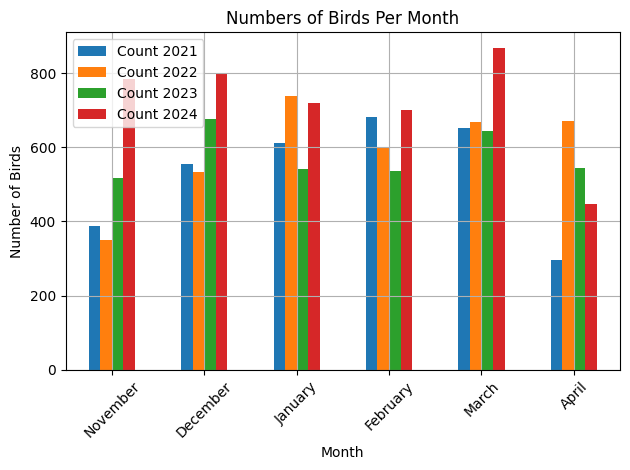

In [115]:
### PLOTS ###
#  matplotlib is plt
ax = feeder_visits_total.plot(kind='bar')

ax.set_title('Monthly bird visits')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Birds')

plt.xticks(rotation=45)

plt.tight_layout()
plt.grid()
plt.xlabel('Month')
plt.ylabel('Number of Birds')
plt.title('Numbers of Birds Per Month')
plt.legend()

plt.show()

### Congratulations if you've made it this far, now we'll talk about my favorite bird!

The graphs are for the nuthatches most active months, January and December, added together over the years for a look at what days Nuthatch's prefer to visit their local feeders.   I had noticed in the Nuthatch Locations that they were constantly showing up at the Imhoff Rd. Feeder so that means I could have a good chance of going and seeing in this coming year on 12/27/24 or 1/10/25!

I will have to update if my local Nuthatch shows up on my feeders during that time.

If you're still itching for more White-Breasted Nuthatch information, [Click Here](https://www.allaboutbirds.org/guide/White-breasted_Nuthatch/overview)

In [116]:
print(Nuthatch_df.size)

Nuthatch_Monthly_df = Nuthatch_df.groupby('Month').size().reset_index(name='Count').sort_values(by='Count',ascending=False)
Nuthatch_Locations_df = Nuthatch_df.groupby('Location').size().reset_index(name='Count').sort_values(by='Count',ascending=False)
Nuthatch_January_df = Nuthatch_df[(Nuthatch_df['Month'] == 'January')]
Nuthatch_January_Days_df = Nuthatch_January_df.groupby('Date').size().reset_index(name='Count')
Nuthatch_December_df = Nuthatch_df[(Nuthatch_df['Month'] == 'December')]
Nuthatch_December_Days_df = Nuthatch_December_df.groupby('Date').size().reset_index(name='Count')
print(Nuthatch_Monthly_df.head(5))
print(Nuthatch_Locations_df.head(5))
print(Nuthatch_December_Days_df.head(5))
print(Nuthatch_January_Days_df.head(5))

3350
      Month  Count
1  December    130
3   January    130
4     March    117
5  November    108
2  February    106
                                             Location  Count
9   6963, Imhoff Road, Reily Township, Butler Coun...     87
14  7741, Bonnie Drive, West Chester Township, But...     80
2   260, South Mill Street, Seven Mile, St. Clair ...     78
5   4259, Stone Creek Drive, Greystone, Liberty To...     75
11  7061, Forest View Drive, West Chester Township...     69
    Date  Count
0  12-01      2
1  12-02      4
2  12-03      3
3  12-04      3
4  12-05      5
    Date  Count
0  01-01      3
1  01-02      4
2  01-03      5
3  01-04      6
4  01-05      5


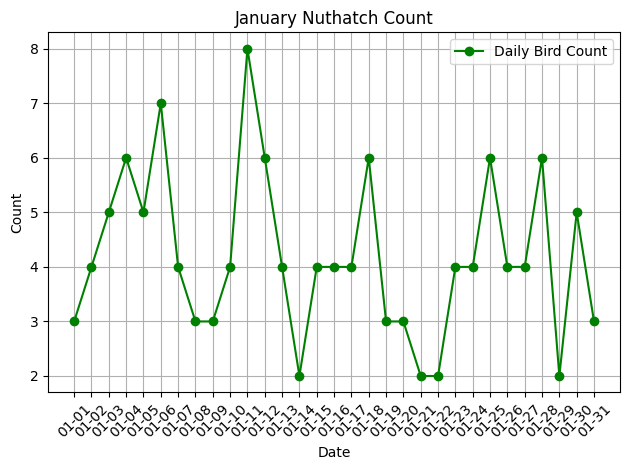

In [117]:
#NUTHATCH January CHART
plt.plot(Nuthatch_January_Days_df['Date'],Nuthatch_January_Days_df['Count'],marker='o',color='green',label='Daily Bird Count')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('January Nuthatch Count')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()



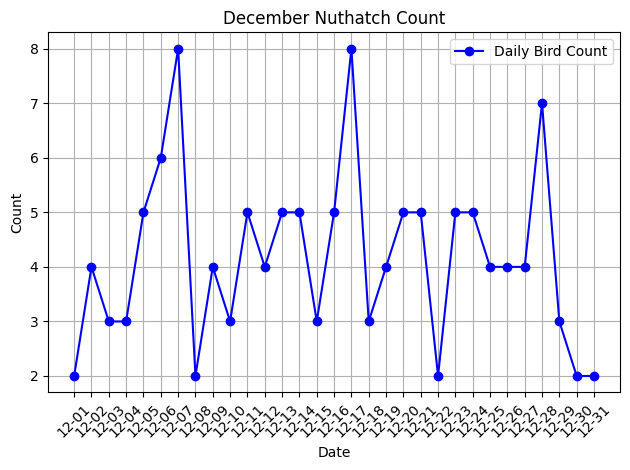

In [118]:
#NUTHATCH December CHART
plt.plot(Nuthatch_December_Days_df['Date'],Nuthatch_December_Days_df['Count'],marker='o',color='blue',label='Daily Bird Count')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('December Nuthatch Count')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()